## CHAPTER 2
### 머신러닝 프로젝트 처음부터 끝까지

## 2.1 실제 데이터로 작업하기

공개된 실제 데이터로 실험해보는 것이 좋다.

여기서는 캘리포니아 주택 가격 데이터셋을 사용한다.

## 2.2 큰 그림 보기

캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것이 목표이다.

데이터의 종류와 어떤 방식으로 조사했는지 알아본다.

머신러닝 프로젝트 체크리스트를 준비한다.

* 2.2.1 문제정의

비즈니스의 목적이 정확히 무엇인지 알아낸다.(문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지 결정하기 때문에 아주 중요)

데이터 처리 컴포넌트들이 연속되어 있는 것을 데이터 파이프라인이라고 한다. 머신러닝 시스템은 파이프라인을 사용하는 일이 매우 흔하다.

현재 솔루션은 어떻게 구성되어 있는지 확인한다.(참고할 수 있기 때문)

위 모든 것들을 보고 문제를 정의한다.(지도 학습, 다중 회귀, 배치 학습,,,)

* 2.2.2 성능 측정 지표 선택

회귀 문제의 전형적인 성능 지표는 '평균 제곱근 오차(RMSE)'이다. 이는 예측에 얼마나 많은 오류가 있는지 가늠하게 해준다.

이상치로 보이는 구역이 많다고 가정하면, 다른 성능 지표를 사용할 수 있다. 바로 '평균 절대 오차(MAE)'를 사용한다.

노름의 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시된다. 그래서 RMSE가 MAE보다 조금 더 이상치에 민감하다.

* 2.2.3 가정 검사

마지막으로 지금까지 만든 가정을 나열하고 검사해보는 것이 좋다.

가정의 예시: 시스템이 출력한 구역의 가격이 다음 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정했다. 하지만 하위 시스템(위 시스템에서 밑 시스템으로 가는 흐름을 생각하자)에서 이 값을 ('저렴','보통','고가' 같은) 카테고리로 바꾸고 가격 대신 카테고리를 사용하면 어떻게 될까? 이럴 때는 정확한 가격을 구하는 것이 전혀 중요하지 않다. 올바른 카테고리를 구하는 시스템이 필요하다. 그렇다면 이제 이 문제는 회귀가 아니라 분류 작업이 된다. 즉 미리 여러 가정들을 검사하여 문제 정의가 목적에 맞게 설정 되었는지 미리 확인한다.(큰 일을 시작하기 전에..) 

## 2.3 데이터 가져오기

* 2.3.1 작업환경 만들기

머신러닝 코드와 데이터셋을 저장할 작업 디렉터리를 만든다.



* 2.3.2 데이터 다운로드

데이터를 내려받는 일을 자동화하면 여러 방면에서 유용하다.

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

* 2.3.3 데이터 구조 훑어보기



In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()    #info() 메서드는 테이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity 열의 값이 반복되는 것으로 보아서 이 특성은 아마도 범주형(categorical)일 것이다.

어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 value_counts() 메서드로 확인한다

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()   #describe() 메서드는 숫자형 특성의 요약 정보를 보여준다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


데이터의 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다.

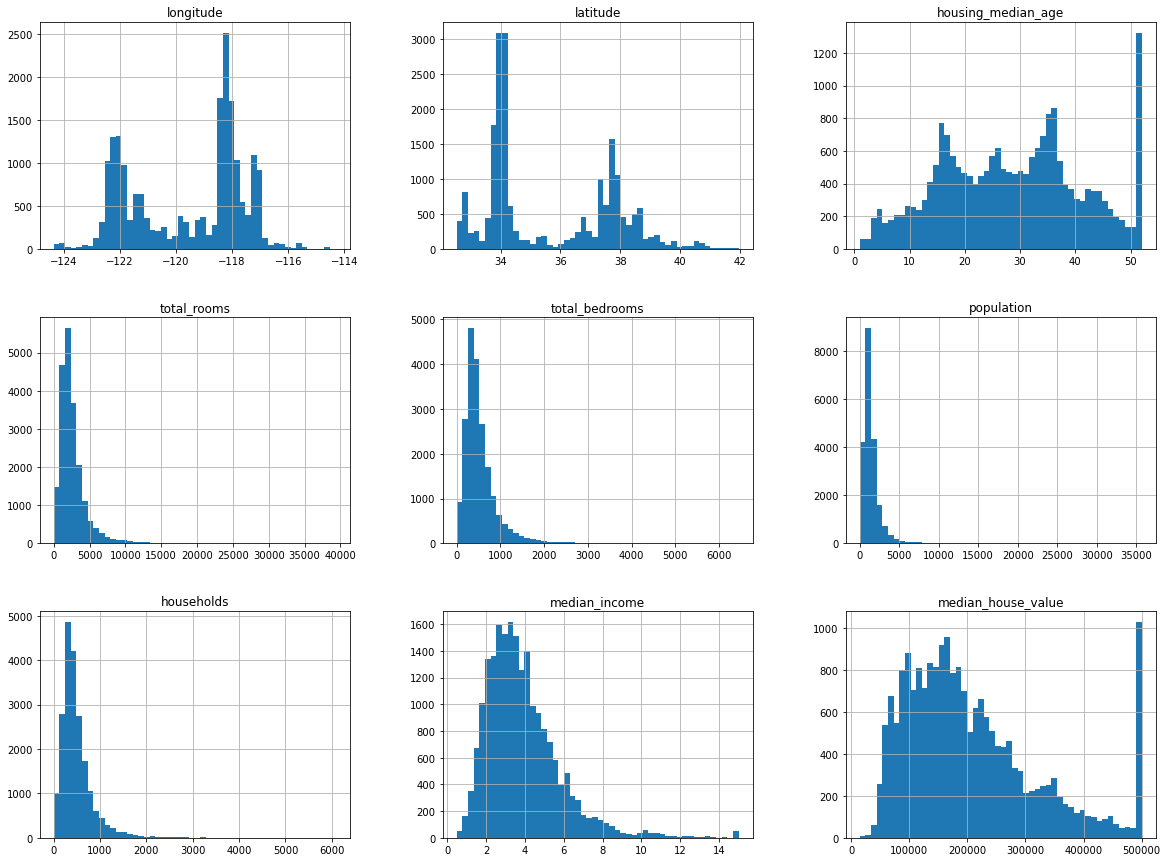

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

데이터가 어떨게 계산된 것인지 반드시 이해하고 있어야한다.(median_income은 데이터를 취합한 팀에서 스케일을 조정하고, 상한이 15, 하한이 0.5가 되도록 만들었다.)

housing_median_age와 median_house_value 역시 최댓값과 최솟값을 한정했다. 이것이 문제가 될지 안 될지는 클라이언트 팀과 함께 검토하는 것이 좋다.

만약 언제나 정확한 예측값이 필요하다고 한다면 우리가 선택할 수 있는 방법은 두 가지이다.
1. 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
1. 훈련 세트에서 이런 구역을 제거한다.

특성들의 스케일이 서로 많이 다르다. 나중에 특성 스케일링이 필요하다.

종 모양의 분포가 아닌 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시킨다.

* 2.3.4 테스트 세트 만들기

데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 한다. 그리고 테스트 세트를 절대 들여다보면 안된다. 만약 테스트 세트를 들여다 본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모르기 때문이다. 우리 뇌는 매우 과대적합하기 쉬운 엄청난 패턴 감지 시스템이다.



무작위로 어떤 샘플을 선택해서 데이터 셋의 20% 정도를(또는 데이터셋이 매우 크다면 그보다 적게) 떼어놓으면 된다.

In [10]:
import numpy as np

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

위의 코드처럼 테스트 셋을 나누면 문제가 생긴다.

프로그램을 다시 실행하면 다른 테스트 세트가 생성된다. 여러 번 계속하면 우리는(또는 우리 머신러닝 알고리즘이) 전체 데이터셋을 보는 셈이므로 이런 상황은 피해야 합니다.

(나의 생각) 이 train set을 직접 보며 여러 가지를 결정할 것인데, 이 것이 계속 바뀌면 우리는 보면 안되는 set를 직접 보게 될 것이고, 그것은 우리의 결정에 영향을 줄 것이다.

또한 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것이다.

이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지된다.

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

 행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야한다. 왜냐하면 각 행에 대응하는 데이터의 인덱스가 바뀌면 해시값도 바뀌기 때문이다.
 
 앞서 말한 조건이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성을 사용한다. 예를 들어 위도와 경도는 잘 바뀌지 않을 것이다. 이 두 값을 연결해 ID를 만들 수 있다.

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


<AxesSubplot:>

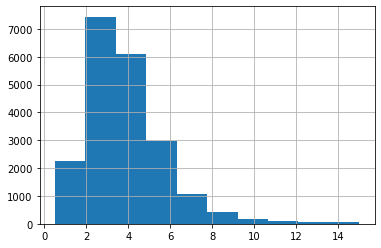

In [17]:
housing["median_income"].hist()

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


지금까지 본 순수한 무작위 샘플링 방식은 일반적으로 괜찮지만, 때론 샘플링 편향이 생길 수 있다.

계층적 샘플링을 이용한다.

전체는 계층이라는 동질의 그룹으로 나누고, 테스트 세트가 전체를 대표하도록 각 계층에서 올바른 수의 샘플을 추출한다.

계층의 비율을 정할 때에도 편향이 발생하지 않도록 주의해야한다.(너무 많은 계층은 지양, 각 계층이 충분히 커야한다.)

계층을 나누는 특성은 예측을 하는데 있어서 매우 중요한 특성이다.(ex. 'median_income' 특성과 '중간 주택 가격')

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [21]:
housing["income_cat"].value_counts()    #각 계층의 비율을 알 수 있다.

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

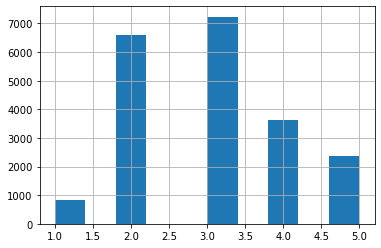

In [22]:
housing["income_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)    #테스트 세트에서 소득 카테고리의 비율

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
housing["income_cat"].value_counts() / len(housing)   #전체 세트에서 소득 카테고리의 비율

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props    #계층 샘플링과 순수한 무작위 샘플링의 샘플링 편향 비교

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


이제 test set를 만들기 위해 만들었던 새로운 특성인 income_cat을 삭제해서 데이터를 둰래 상태로 되돌린다.

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.4 데이터 이해를 위한 탐색과 시각화

지금까지는 데이터를 간단히 살펴보았다. 이제는 조금 더 깊이 파악해보도록 한다.

여기서는 "훈련 세트"에 대해서만 탐색을 한다.

훈련 세트가 너무 크면 조작을 간단하고 빠르게 하기 위해 탐색을 위한 세트를 별도로 샘플링할 수도 있다.

훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용한다.

In [29]:
housing = strat_train_set.copy()

* 2.4.1 지리적 데이트 시각화



<AxesSubplot:xlabel='longitude', ylabel='latitude'>

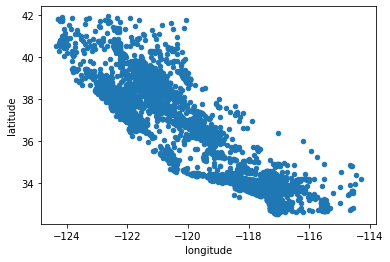

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude")

위 그림은 캘리포니아 지역을 잘 나타내지만 어떤 특별한 패턴을 찾기는 힘들다. 그러므로 옵션을 조절한다.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

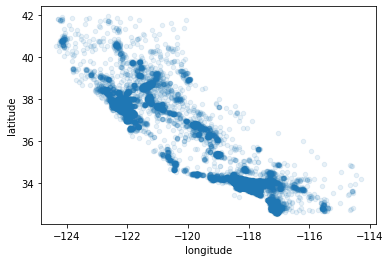

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

밀집된 지역이 눈에 잘 띈다.

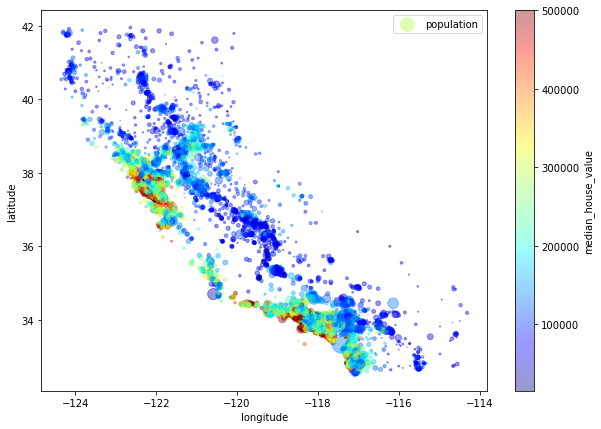

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

위 그래프를 분석해 보면, 주택 가격은 지역(예를 들면 바다와 인접한 곳)과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있다.

* 2.2.4 상관관계 조사

모든 특성 간의 표준 상관계수를 계산한다.



In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

특성 사이의 상관관계를 확인하는 다른 방법은 숫자형 특성 사이에 산점도를 구려주는 것이다.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

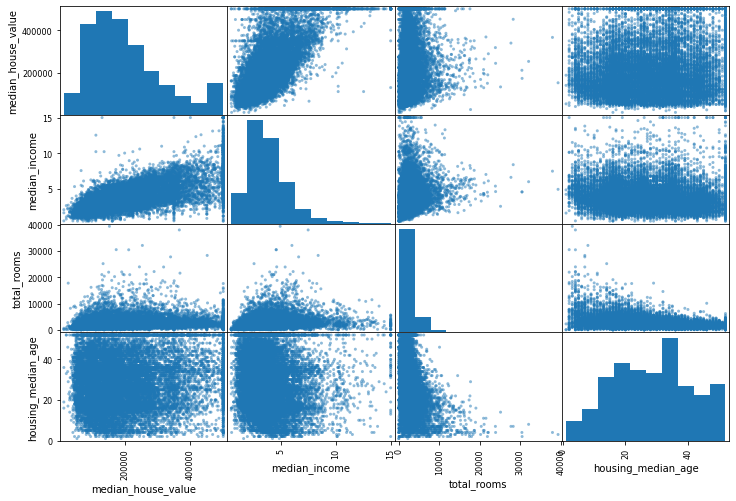

In [35]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

중간 주택 가격(median_house_value)을 예측하는 데 가장 유용할 것 같은 특성은 중간 소득(median_income)이므로 상관관계 산점도를 확대해본다.

상관 관계가 가장 커 보이는 것을 골라서 더 자세히 보자

(0.0, 16.0, 0.0, 550000.0)

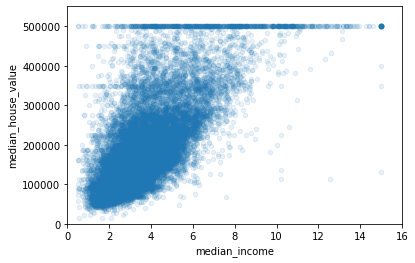

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

알고리즘이 데이터에서 이러한 이상한 형태(수평선)를 학습하지 않도록 해당 구역을 제거하는 것이 좋다.

(결론)정제해야 할 조금 이상한 데이터를 확인했고, 특성 사이(특히 타깃 속성과의 사이)에서 흥미로운 상관관계를 발견했다.

* 2.4.3 특성 조합으로 실험

머신러닝 알고리즘용 데이터를 준비하기 전에 마지막으로 해볼 수 있는 것은 여러 특성의 조합을 시도해보는 것이다.

(예시) 방 개수 --> 가구당 방 개수

(예시) 침실 개수 --> 방 개수 당 침실 개수
       
(예시) 가구당 인원(new)

(나의 생각) 앞서 시각적으로 본 타깃 속성과 특성 사이의 상관관계를 보고 어떤 특성을 조합할지 결정하면 되겠다.

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

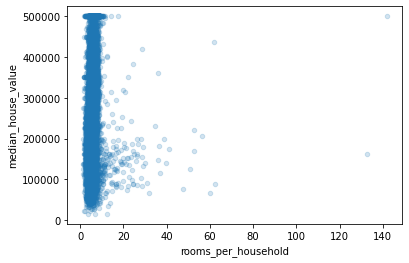

In [40]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.show()

In [41]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


새로운 bedrooms_per_room 특성은 전체 방 개수나 침실 개수보다 중간 주택 가격가의 상관관계가 훨씬 높다.(침실/방의 비율이 낮은 집은 더 비싼 경향이 있다.)

(나의 생각) 그러한 경향이 나타나는 이유는 비싼 집일수록 서재와 아이들 놀이공간같은 여유 공간이 더 존재하기 때문이 아닐까?

가구당 방 개수도 구역 내 전체 방 개수보다 더 유용하다.(당연히 더 큰 집이 더 비싸다.)

(나의 생각) 일단 조합으로 특성을 만들어 보고 상관계수를 구해서 그 효용성을 구하면 된다.

머신러닝 프로젝트는 빠른 프로토타이핑과 반복적인 프로세스가 권장된다.

(질문) 이렇게 타깃과 상관계수가 높은 특성을 만들면 더 정확한 예측 모델을 만들 수 있는것?

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

데이터를 준비하는 작업은 수동으로 하는 대신 함수를 만들어 자동화한다.

원래 훈련 세트를 유지하기 위해 따로 복사해서 사용한다.

복사한 것은 예측 변수와 레이블을 분리하여 복사한다.(예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해)

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


* 2.5.1 데이터 정제

누락된 특성을 처리한다.

1. 해당 구역을 제거
1. 전체 특성을 삭제
1. 어떤 값으로 채움(0,평균,중간값 등)

책에 소개된 세 개의 옵션은 다음과 같습니다:

housing.dropna(subset=["total_bedrooms"])    # 옵션 1

housing.drop("total_bedrooms", axis=1)       # 옵션 2

median = housing["total_bedrooms"].median()  # 옵션 3

housing["total_bedrooms"].fillna(median, inplace=True)

각 옵션을 설명하기 위해 주택 데이터셋의 복사본을 만듭니다. 이 때 적어도 하나의 열이 비어 있는 "행"만 고릅니다. 이렇게 하면 각 옵션의 정확한 동작을 눈으로 쉽게 확인할 수 있습니다.

In [55]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()   #5개의 행만 보여주는 것
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [56]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1
#이거 결과가 모든 행이 삭제되어서 아무것도 뜨지 않는 것이다.
#subset = ["total_bedrooms"]는 이 열에서 결측치가 있는 행만을 삭제하라는 명령이다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [46]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [49]:
median = housing["total_bedrooms"].median()    #테스트 세트의 누락값과 새 데이터의 누락값에 넣어줘야하기 때문에 변수에 따로 저장한다.
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3

In [50]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


사이킷런의 SimpleImputer 객체를 이용하여 누락된 값을 손쉽게 다룰 수 있다.

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제한다.

In [58]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [59]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [61]:
imputer.statistics_    #각 특성의 중간값을 계산해서 저장한 꼴

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [63]:
housing_num.median().values    #이것은 수동으로 중간값을 계산한 것(위 배열과 같은 것을 알 수 있다.)

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
X = imputer.transform(housing_num)    #훈련세트를 반환한다.

In [67]:
housing_num.info()    #이것은 훼손되지 않는다.(결측치가 사라지지 않은 것을 확인할 수 있다.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [70]:
X    #평범한 넘파이 뱅열이다

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

넘파이 배열을 다시 판다스 데이터프레임으로 간단히 되돌릴 수 있다.

In [71]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [72]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


* 2.5.2 텍스트와 범주형 특성 다루기

이제 범주형 특성인 ocean_proximity를 전처리한다.

In [73]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


카테고리를 텍스트에서 숫자로 변환한다.

In [74]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [75]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

(문제) 이 표현 방식(연속된 숫자를 이용한 카테고리화)의 문제는 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 것이다.

(해결) 이 문제는 일반적으로 카테고리별 이진 특성(0/1)을 만들어 해결한다. 이를 원-핫 인코딩이라고 한다.

사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 OneHotEncoder 클래스를 제공한다.

In [76]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

출력을 보면 넘파이 배열이 아닌 사이파이 "희소 행렬"이다.

이것은 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적이다.

(이유) 이런 특성을 원-핫 인코딩하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나뿐이고 그 외에는 모두 0으로 채워져 있을 것이다. 0을 모두 메모리에 저장하는 것은 낭비이다. 그러므로 희소행렬은 0이 아닌 원소의 위치만 저장한다.

이는 넘파이 배열로 바꿀 수 있다.

In [77]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

여기서도 인코더의 categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있다.

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

(Tip) 카테고리의 특성이 너무 많으면 훈련이 느려지고 성능이 감소할 수 있다. 이를 해결하기 위해 두 가지 방법을 사용할 수 있다.

1. 범주형 입력값을 이 특성과 관련된 숫자형 특성으로 바꾼다.(예를들어, ocean_proximity 특성을 해안까지 거리로 바꿀 수 있다.)
1. 각 카테고리를 임베딩이라고 부르는 학습 가능한 저차원 벡터로 바꿀 수 있다. 이는 표현 학습의 한 예이다.(나중에 배운다.)

* 2.5.3 나만의 변환기

사이킷런은 유용한 변환기(카테고리 -> 숫자)를 많이 제공하지만 특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기를 만들어야 할 때가 있다.

이 변환기를 사이킷런의 기능과 매끄럽게 연동할 수 있다.

조합 특성(기존의 특성으로 만든 특성)을 추가하는 간단한 변환기를 만든다.

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

책에서는 간단하게 인덱스 (3, 4, 5, 6)을 하드코딩했지만 다음처럼 동적으로 처리하는 것이 더 좋습니다:

In [81]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

또한 housing_extra_attribs는 넘파이 배열이기 때문에 열 이름이 없습니다(안타깝지만 사이킷런을 사용할 때 생기는 문제입니다). DataFrame으로 복원하려면 다음과 같이 할 수 있습니다:

In [82]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


머신러닝 시스템에 도움이 될지 100% 확신이 없는 모든 데이터 준비 단계에 대해 하이퍼파라미터를 추가할 수 있다. 위 코드에서 add_bedrooms_per_room을 True/False로 지정 후 간단히 테스트 해볼 수 있다.

이렇게 자동화를 시키면 더 많은 조합을 자동으로 시도해볼 수 있고, 최상의 조합을 찾을 가능성을 매우 높인다.

(나의 생각) 원본 데이터로부터 계속 변환을 하여 데이터를 처리하는 과정이 데이터 전처리이다. 여기서 class의 메서드를 통해 이 변환과정을 자동화한다(변환기). 그리고 이러한 변환기를 쓰기 위해서는 추정기가 필요한 것이다.

* 2.5.4 특성 스케일링

데이터에 적용할 가장 중요한 "변환" 중 하나가 특성 스케일링이다.

(이유) 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않는다.

모든 특성의 범위를 같도록 만들어주는 방법으로는 min-max 스케일링과 표준화가 널리 사용된다.

1. min-max 스케일링은사이킷런의 MinMaxScaler 변환기를 이용한다.(이상치에 민감할 수 있다.)
1. 표준화(standardization)는 사이킷런의 StandardScaler 변환기를 이용한다.(이상치의 영향을 덜 받는다.)

* 2.2.5 변환 파이프라인

앞서 보았듯이 변환 단계가 많으며 정확한 순서대로 실행되어야 한다. 

사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스가 있다.

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [84]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

파이프라인의 fit() 메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다. 

파이프라인 객체는 마지막 추정기(혹은 변환기)와 동일한 메서드를 제공한다.

파이프라인의 마지막 단계 빼고는 모두 변환기(즉, fit_transform() 메서드를 가지고 있어야한다.)여야한다. 마지막 단계는 추정기, 변환기 모두 가능하다.

하나의 변환기로 각 열(범주형, 수치형)마다 적절한 변환을 적용하여 모든 열을 처리할 수 있다면 더 편리할 것이다.

사이킷런의 ColumnTransformer을 사용하면 된다.



In [85]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [88]:
housing_prepared   #변환 후 반환 받은 객체

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [89]:
housing_prepared.shape   #[0,0,0,0,0,1,0,0,0,0] 이런게 그냥 한 행에 나와있다.

(16512, 16)

전체 주택 데이터를 받아 각 열에 적절한 변환을 적용하는 전처리 파이프라인을 만들었다!

변환기와 그것들을 모아둔 파이프 라인은 fit_transform으로 모든 것이 연결된다.

## 2.6 모델 선택과 훈련

지금까지 문제를 정의한 후 데이터를 읽어 들이고 탐색했다. 그리고 훈련 세트와 테스트 세트로 나누고 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인을 작성했다, 

이제 머신러닝 모델을 선택하고 훈련시킬 준비가 되었다.

* 2.6.1 훈련 세트에서 훈련하고 평가하기

선형 회귀 모델을 훈련시켜본다.

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [92]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

print("레이블:",list(some_labels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


아주 정환한 예측은 아니지만 작동은 한다.

사이킷런의 mean_square_error 함수를 사용해 전체 훈련 세트에 대한 이 회귀 모델의 RMSE를 측정해본다. 

In [93]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [95]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)    #RMSE를 바로 구하는 방법
lin_mae

49439.89599001897

만족스럽지 못한 결과이다. 왜냐하면 대부분 구역의 중간 주택 가격은 $120.000에서 $265.000 사이인데 error값이 68.000 이기 때문이다.

(문제) 이는 모델이 훈련 데이터에 과소적합된 사례이다.

(해결) 더 강력한 모델을 선택하거나 훈련 알고리즘에 더 좋은 특성을 주입하거나 모델의 규제를 감소시키는 것이다.

먼저 더 복잡한 모델을 시도해서 해결해 보도록 한다.

DecisionTreeRegressor를 훈련시킨다.

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

모델을 훈련시켰으니 훈련 세트로 평가해본다.

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

이는 모델이 데이터에 너무 심하게 과대적합된 것으로 보인다.

테스트 세트는 확신이 드는 모델이 론칭할 준비가 되기 전까지 사용하지 않는다.

그런데 훈련 세트 전부를 사용해 훈련을 하면 앞선 예시처럼 과대적합된 것을 고를 수 있다.(왜냐하면 오차가 작은 것을 고르려고 하기 때문이다.)

그렇다고 해서 일부러 너무 오차가 작은 것을 고르지 않고 적절한 오차가 있는 모델을 선택하고자 하는 것도 "애매"하다.

그러므로 훈련 세트의 일부분으로 훈련을 하고 다른 일부분은 모델 검증에 사용해야 한다.

결국 (여러 모델들 중)어떤 모델의 선택은 훈련 세트(훈련+검증)를 통해서만 하고 테스트 세트를 통해서는 절대 하지 않는다.

* 2.6.2 교차 검증을 사용한 평가
 
train_test_split 함수를 사용해 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나눈다.

더 작은 훈련 세트에서 모델을 훈련시키고 검증 세트로 모델을 평가한다

다른 대안으로 사이킷러의 k-겹 교차 검증 기능을 사용하는 방법이 있다.

결정 트리 모델(결과적으로 과대적합)

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)    #10개의 폴드로 나누어서 진행한다.
tree_rmse_scores = np.sqrt(-scores)

In [100]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


교차 검증으로 모델의 성능을 추정하고, 이 추정이 얼마나 정확한지(즉, 표준편차) 측정할 수 있다.

그러나 비용이 비싸므로 교차 검증을 언제나 쓸 수 있는 것은 아니다.

선형 회귀 모델

In [101]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.6740017983443


랜덤 포레스트 모델

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

훈련 세트에 대한 점수

In [103]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

검증 세트에 대한 점수

In [104]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


랜덤 포레스트는 앞서 본 두 모델보다 훌륭하다.

그러나 훈련세트에 대한 점수가 검증 세트에 대한 점수보다 훨씬 낮으므로 이 모델도 여전히 과대적합되어 있다.

In [105]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [107]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

다양한 모델을 실험해 보고 가능성 있는 2~5개 정도의 모델을 선정하는 것이 목표이다.

## 2.7 모델 세부 튜닝

앞서 선정한 모델들을 세부 튜닝한다.

* 2.7.1 그리드 탐색

사이킷런의 GridSearchCV를 사용한다.

탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하기만 하면 된다.

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

(Tip) 어떤 하이퍼파라미터 값을 지정해야 할지 모를 때는 연속된 10의 거듭제금 수로 시도해보는 것이 좋다.

하이퍼파라미터 값을 지정(모델 완성) -> 이 모델로 교차 검증 실행(이 단계에서 fit도 실행한다.)

최상의 파라미터 조합은 다음과 같다.

In [111]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

(Tip) 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색해야 한다.

In [113]:
grid_search.best_estimator_    #최적의 추정기에 직접 접근

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [115]:
#평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [116]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057368,0.001038,0.003400,0.000489,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.179207,0.002257,0.008556,0.000428,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.531267,0.003318,0.024104,0.000384,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.085410,0.001247,0.003172,0.000239,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.281048,0.002200,0.008586,0.000200,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.838907,0.003475,0.024161,0.000315,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.113554,0.003348,0.003034,0.000074,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.385078,0.007683,0.008936,0.000345,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.146516,0.004853,0.023938,0.000669,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.144644,0.003481,0.003078,0.000084,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


하이퍼파라미터가 최적인 상태에서 RMSE 점수가 49,682로 앞서 기본 하이퍼파라미터 설정으로 얻은 50,182(10개의 폴드의 평균)점보다 조금 더 좋다. 

결국 모델 세부 튜닝을 통해 더 좋은 모델을 찾아냈다.

* 2.7.2 랜덤 탐색

하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV를 사용하는 것이 좋다.

각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가한다.

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C7DA954AF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C7DA43C640>},
                   random_state=42, scoring='neg_mean_squared_error')

In [118]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


* 2.7.3 앙상블 방법

모델의 그룹(또는 앙상블)이 최상의 단일 모델보다 더 나은 성능을 발휘할 때가 많다.

(나중에 더 살펴보도록 한다.)

* 2.7.4 최상의 모델과 오차 분석

최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많다.



In [120]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances    #각 특성의 상대적인 중요도를 알려준다.

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [122]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)    #위에서 구한 중요도와 그에 대응하는 특성 이름을 표시한다.

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

이 정보를 바탕으로 덜 중요한 특성들을 제외할 수 있다.

* 2.7.5 테스트 세트로 시스템 평가하기

어느 정도 모델을 튜닝하면 마침내 만족할 만한 모델을 얻는다.

이제 테스트 세트에서 최종 모델을 평가한다.

테스트 세트에서 예측 변수와 레이블을 얻은 후 full_pipeline을 사용해 데이터를 변환한다.

그리고 이제 테스트 세트에서 최종 모델을 평가한다.

In [124]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

이 일반화 오차의 추정값이 얼마나 정확한지 알고 싶을 것이다.

일반화 오차의 95% 신회 구간을 계산할 수 있다.

In [125]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

이 단계에서 테스트 세트에서 성능 수치를 좋게 하려고 하이퍼파라미터를 튜닝하려 시도해서는 안된다.

왜냐하면 향상된 성능은 새로운 데이터에 일반화되기 어렵기 때문이다.

## 2.8 론칭, 모니터링, 시스템 유지 보수

배포가 마지막이 아니다.

모니터링 코드를 작성해야 한다.

모델의 실전 성능을 모니터링해야 한다.

모델의 입력 데이터 품질을 평가한다.

만든 모델을 백업한다.